In [36]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [37]:
#Load Iris Dataset 
iris = load_iris()

# Get the predictor and response variables
X = iris.data
y = iris.target

# Get the iris label names
target_names = iris.target_names
print(X.shape, y.shape) 

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

(150, 4) (150,)


In [38]:
# Helper function to plot the data as clusters based on the iris specie label

def plot3clusters(X, title, vtitle):
    plt.figure()
    
    # Select the colours of the clusters
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw, label=target_name)
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

In [39]:
### edTest(test_check_ae) ###

# Create an AE and fit it with our data using 2 neurons in the dense layer using keras' functional API

# Get the number of data samples i.e. the number of rows
input_dim = X_scaled.shape[1]

# Specify the number of neurons for the dense layer
encoding_dim = 2  

# Specify the input layer
input_features = tf.keras.Input(shape=(input_dim,))

# Add a denser layer as the encode layer following the input layer with 2 neurons and no activation function
encoded = tf.keras.layers.Dense(encoding_dim, activation=None)(input_features)

# Add a denser layer as the decode layer following the encode layer with input_dim as a parameter and no activation function
decoded = tf.keras.layers.Dense(input_dim, activation=None)(encoded)

# Create an autoencoder model which has input as input_features and outputs decoded
autoencoder = tf.keras.Model(input_features, decoded)

# Complile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# View the summary of the autoencoder
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


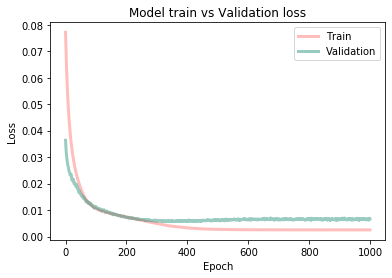

In [40]:
# Use the helper function to plot the model history

# Get the history of the model to plot
history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


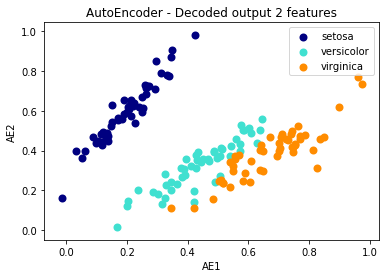

In [41]:
# Predict on the entire data using the autoencoder model 
preds = autoencoder.predict(X_scaled)

# Call the function plot3clusters to plot the data
plot3clusters(preds[:,:2], 'AutoEncoder - Decoded output 2 features', 'AE') 


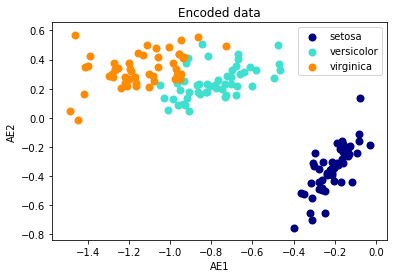

In [42]:
# Create a model which has input as input_features and output as encoded
encoder = tf.keras.Model(input_features, encoded)

# Predict on the entire data using the encoder model 
encoded_data = encoder.predict(X_scaled)

# Call the function plot3clusters to plot the predicted data using the encoded layer
plot3clusters(encoded_data, 'Encoded data', 'AE')  